# Odhad CDPF

## Cíl analýzy

## Data a metoda

NAMA_10_A10

In [6]:
import eurostat
import pandas

LOCATIONS = ["CZ", "DE", "AT", "EU27_2020", "ES"]
BASE_LOCATION = "CZ"
START_YEAR = 1975
END_YEAR = 2020

,unit,na_item,geo\time,variable,value
2065,CP_MEUR,B1G,SI,2020,41480.4
2066,CP_MEUR,B1G,SK,2020,82420.9
2067,CP_MEUR,B1G,TR,2020,557023.3
2068,CP_MEUR,B1G,UK,2020,NaN
2069,CP_MEUR,B1G,XK,2020,5590.5


### Hrubá přidaná hodnota (Gross Value Added)

In [32]:
data_1 = eurostat.get_data_df('nama_10_a10')
# Value added, gross
data_1 = data_1[data_1["na_item"] == "B1G"]
# Total, all NACE activities
data_1 = data_1[data_1["nace_r2"] == "TOTAL"]
# Current prices, million euro
data_1 = data_1[data_1["unit"] == "CP_MNAC"]
data_1 = pandas.melt(data_1, id_vars=["unit", "na_item", "geo\\time"], value_vars=list(range(START_YEAR, END_YEAR + 1)),
                     value_name="gross_value_added", var_name="year")
data_1 = data_1.sort_values(["geo\\time", "year"])
data_1["gross_value_added_t_minus_1"] = data_1.groupby("geo\\time")["gross_value_added"].shift(-1)
data_1["gross_value_added_diff"] = (data_1["gross_value_added"] - data_1["gross_value_added_t_minus_1"]) / data_1["gross_value_added"]
data_1.tail()

,unit,na_item,geo\time,year,gross_value_added,gross_value_added_t_minus_1,gross_value_added_diff
1889,CP_MNAC,B1G,XK,2016,4847.2,5106.0,-0.053392
1934,CP_MNAC,B1G,XK,2017,5106.0,5379.8,-0.053623
1979,CP_MNAC,B1G,XK,2018,5379.8,5698.6,-0.059259
2024,CP_MNAC,B1G,XK,2019,5698.6,5590.5,0.018970
2069,CP_MNAC,B1G,XK,2020,5590.5,NaN,NaN


geo\time
AT           AxesSubplot(0.125,0.125;0.775x0.755)
CZ           AxesSubplot(0.125,0.125;0.775x0.755)
DE           AxesSubplot(0.125,0.125;0.775x0.755)
ES           AxesSubplot(0.125,0.125;0.775x0.755)
EU27_2020    AxesSubplot(0.125,0.125;0.775x0.755)
Name: gross_value_added_diff, dtype: object

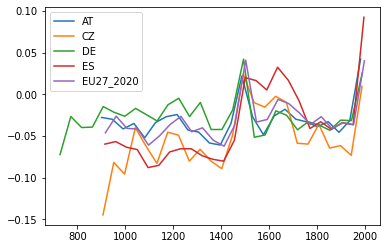

In [33]:
data_1[data_1["geo\\time"].isin(LOCATIONS)].dropna().groupby("geo\\time")["gross_value_added_diff"].plot(legend=True)

In [17]:
data_2 = eurostat.get_data_df('nama_10_a10_e')
# Total employment domestic concept
data_2 = data_2[data_2["na_item"] == "EMP_DC"]
# Total, all NACE activities
data_2 = data_2[data_2["nace_r2"] == "TOTAL"]
# Thousands hours worked
data_2 = data_2[data_2["unit"] == "THS_HW"]
data_2 = pandas.melt(data_2, id_vars=["unit", "na_item", "geo\\time"], value_vars=list(range(START_YEAR, END_YEAR + 1)))
data_2.tail()

,unit,na_item,geo\time,variable,value
1789,THS_HW,EMP_DC,SE,2020,7972760.0
1790,THS_HW,EMP_DC,SI,2020,1594832.0
1791,THS_HW,EMP_DC,SK,2020,3771291.0
1792,THS_HW,EMP_DC,UK,2020,NaN
1793,THS_HW,EMP_DC,XK,2020,NaN


In [14]:
data_3 = eurostat.get_data_df('nama_10_nfa_bs')
# Total fixed assets (net)
data_3 = data_3[data_3["asset10"] == "N11N"]
# Total, all activities
data_3 = data_3[data_3["sector"] == "S1"]
# Current fixed prices, millions of national currency
data_3 = data_3[data_3["unit"] == "CP_MNAC"]
data_3.tail()

,unit,sector,asset10,geo\time,2020,2019,2018,2017,2016,2015,...,1987,1986,1985,1984,1983,1982,1981,1980,1979,1978
2227,CP_MNAC,S1,N11N,RO,NaN,3479663.7,3166374.7,2832229.5,2608914.5,2384474.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2228,CP_MNAC,S1,N11N,SE,NaN,16060787.0,15532975.0,14882199.0,14006799.0,13079854.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2229,CP_MNAC,S1,N11N,SI,NaN,142150.2,138275.8,133568.5,130714.1,129933.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2230,CP_MNAC,S1,N11N,SK,NaN,405362.4,384612.8,367394.5,352552.4,344447.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2231,CP_MNAC,S1,N11N,UK,NaN,4621749.0,4450882.0,4241207.0,4035923.0,3858861.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data_4 = eurostat.get_data_df('nama_10_nfa_fl')
# Total fixed assets (net)
data_4 = data_4[data_4["asset10"] == "N11G"]
# Total, all NACE activities
data_4 = data_4[data_4["nace_r2"] == "TOTAL"]
# Current fixed prices, millions of national currency
data_4 = data_4[data_4["unit"] == "PD10_NAC"]
data_4.tail()

,unit,nace_r2,asset10,geo\time,2020,2019,2018,2017,2016,2015,...,1984,1983,1982,1981,1980,1979,1978,1977,1976,1975
274833,PD10_NAC,TOTAL,N11G,RO,NaN,131.656,124.405,118.008,111.310,112.043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274834,PD10_NAC,TOTAL,N11G,SE,NaN,NaN,113.892,110.472,107.090,105.464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274835,PD10_NAC,TOTAL,N11G,SI,NaN,113.290,111.305,108.977,107.134,106.507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274836,PD10_NAC,TOTAL,N11G,SK,NaN,105.405,104.147,101.821,100.217,100.992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274837,PD10_NAC,TOTAL,N11G,UK,NaN,120.743,117.000,114.704,111.824,109.387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
